# Part A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Understanding & Exploration

1.A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [2]:
Car_Name = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Unsupervised Learning\Car name.csv')

1.B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [3]:
Car_Attributes = pd.read_json(r'C:\Users\GARAVIN4\Documents\GL Course\Unsupervised Learning\Car-Attributes.json')

1.C. Merge both the DataFrames together to form a single DataFrame 

In [4]:
Car_Merged = pd.merge(Car_Name, Car_Attributes, left_index=True, right_index=True)

1.D. Print 5 point summary of the numerical features and share insights

In [5]:
Car_Merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
Car_Merged['hp'] = pd.to_numeric(Car_Merged['hp'], errors='coerce')

In [7]:
Car_Merged.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


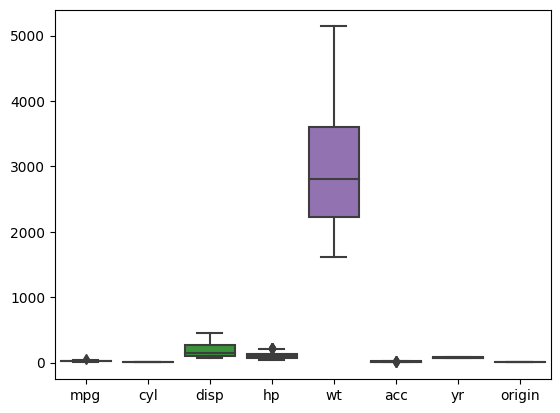

In [8]:
sns.boxplot(data=Car_Merged)
plt.show()

Conclusion: Only 'wt' feature has high variation with range = 3527 (max-min) and rest all features have less or minimum variation as inferred from the 5 point summary and box-plot visualization

2. Data Preparation & Analysis

2.A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [9]:
Car_Merged.isnull().sum() * 100 / len(Car_Merged)

car_name    0.000000
mpg         0.000000
cyl         0.000000
disp        0.000000
hp          1.507538
wt          0.000000
acc         0.000000
yr          0.000000
origin      0.000000
dtype: float64

In [10]:
Car_Merged = Car_Merged.dropna() # removing those data points with missing values

2.B. Check for duplicate values in the data and impute with the best suitable approach

In [11]:
Car_Merged.duplicated().value_counts()

False    392
dtype: int64

In [12]:
Car_Merged.drop_duplicates(inplace=True) # drop duplicate rows

In [13]:
Car_Merged.shape

(392, 9)

2.C. Plot a pairplot for all features

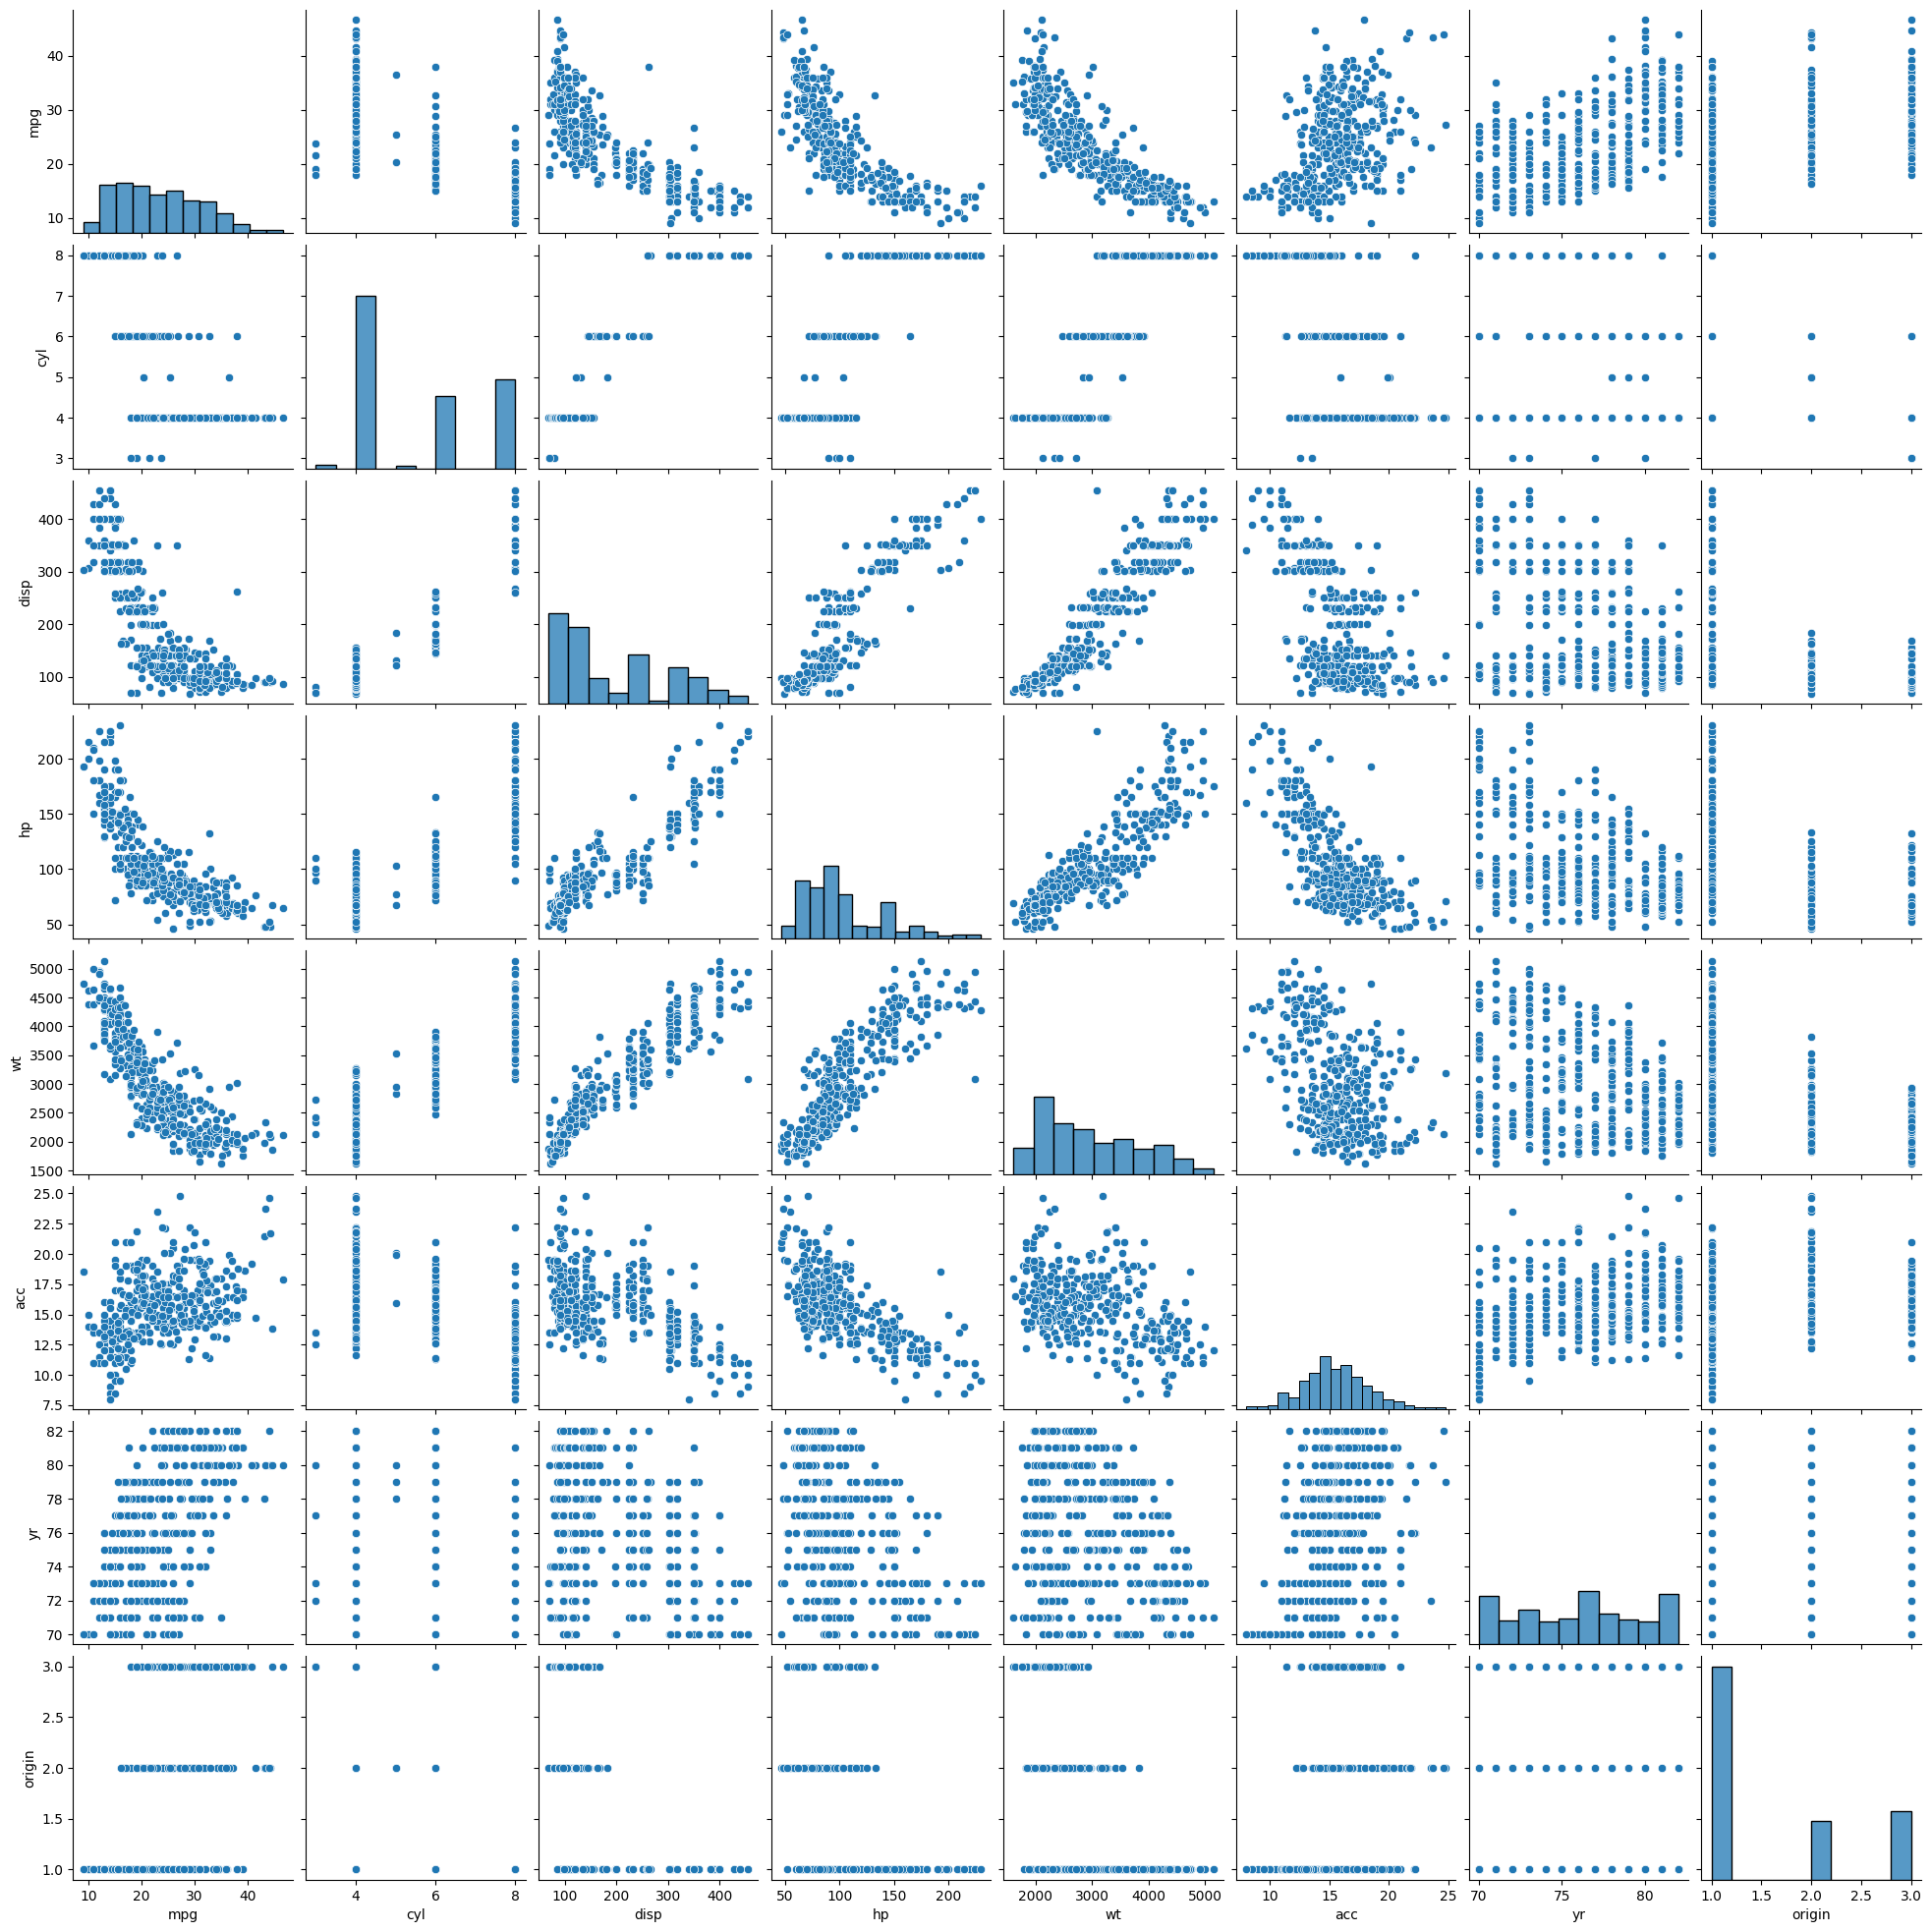

In [14]:
sns.pairplot(Car_Merged)
plt.show()

2.D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

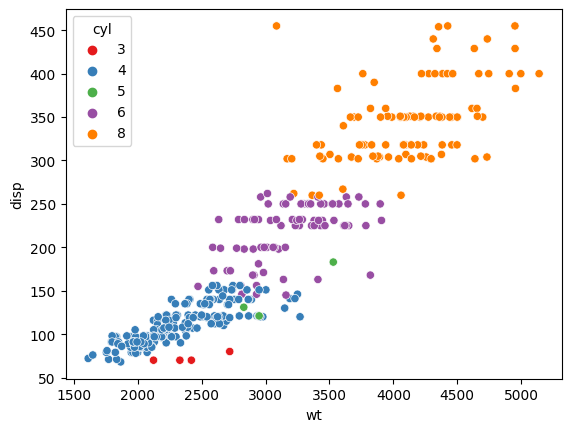

In [15]:
sns.scatterplot(x='wt', y='disp', data=Car_Merged, hue='cyl', palette='Set1')
plt.show()

2.E. Share insights for Q2.d

There is a strong positive correlation between 'wt' and 'disp'. As 'wt' increases 'disp' increases and along with them 'cyl' also increases. So both 'wt' and 'disp' are individually positively correlated with 'cyl'.

2.F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

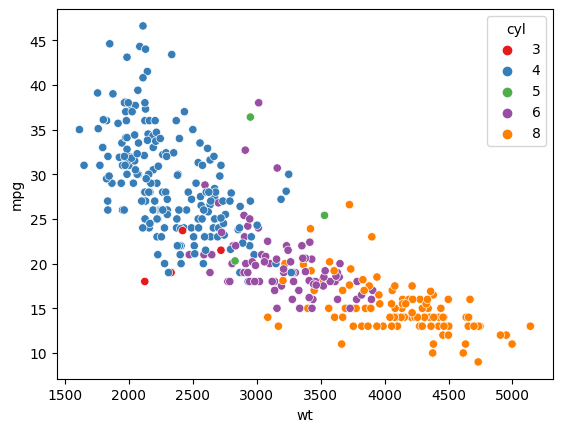

In [16]:
sns.scatterplot(x='wt', y='mpg', data=Car_Merged, hue='cyl', palette='Set1')
plt.show()

2.G. Share insights for Q2.f

There is a strong negative correlation between 'wt' and 'mpg'. 'cyl' has a positive correlation with 'wt' and has a negative correaltion with 'mpg' which is as evident from the chart

2.H. Check for unexpected values in all the features and datapoints with such values

In [17]:
for column in Car_Merged.columns:
    print(column,"-", Car_Merged[column].unique())

car_name - ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'dodge colt ha

In [18]:
print(Car_Merged[Car_Merged['hp'] == '?'])

Empty DataFrame
Columns: [car_name, mpg, cyl, disp, hp, wt, acc, yr, origin]
Index: []


Conclusion: There are no unexpected values found in the dataframe. The 'hp' column doesn't have '?' value as evident above.

3. Clustering

3.A. Apply K-Means clustering for 2 to 10 clusters

In [19]:
from sklearn.cluster import KMeans

Car_Merged_df = Car_Merged.select_dtypes(include=['float64', 'int64'])
distortions = []

# apply K-Means clustering for 2 to 10 clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Car_Merged_df)
    labels = kmeans.predict(Car_Merged_df)
    centroids = kmeans.cluster_centers_
    distortions.append(kmeans.inertia_)

3.B. Plot a visual and find elbow point

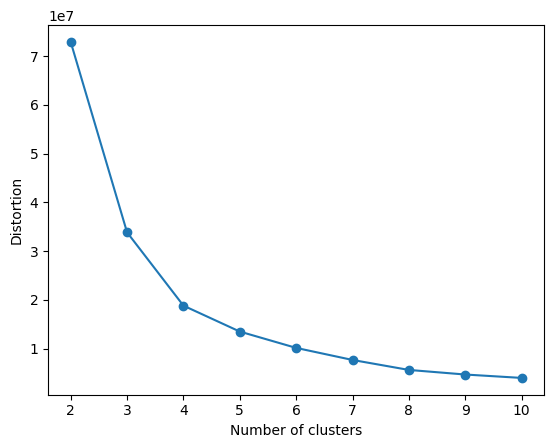

In [20]:
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

3.C. On the above visual, highlight which are the possible Elbow points

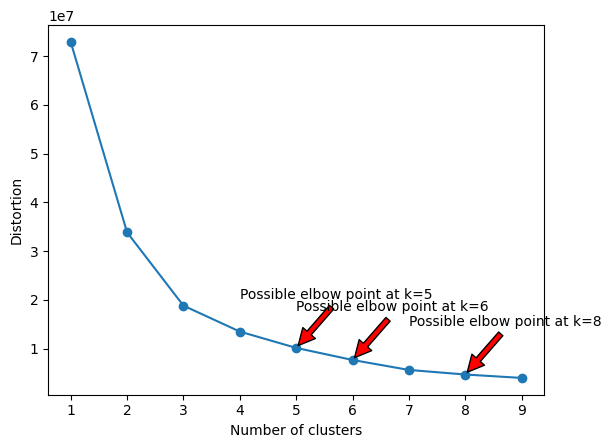

In [21]:
# plot the elbow
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

# identify possible elbow points
k = 4  # set a default value for k
for i in range(1, len(distortions)-1):
    slope1 = (distortions[i] - distortions[i-1]) / (i - (i-1))
    slope2 = (distortions[i+1] - distortions[i]) / ((i+1) - i)
    if abs(slope2 - slope1)/10000000 < 0.1:
        k = i + 1
        plt.annotate(f'Possible elbow point at k={k}', xy=(k, distortions[k-1]), xytext=(k-1, distortions[k-1]+10000000),
                     arrowprops=dict(facecolor='red', shrink=0.05))
        
plt.show()

3.D. Train a K-means clustering model once again on the optimal number of clusters

In [22]:
distortions = []

# apply K-Means clustering for 5 clusters
for k in [5]:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Car_Merged_df)
    labels = kmeans.predict(Car_Merged_df)
    centroids = kmeans.cluster_centers_
    distortions.append(kmeans.inertia_)

3.E. Add a new feature in the DataFrame which will have labels based upon cluster value

In [23]:
Car_Merged['cluster_label'] = kmeans.labels_

3.F. Plot a visual and color the datapoints based upon clusters

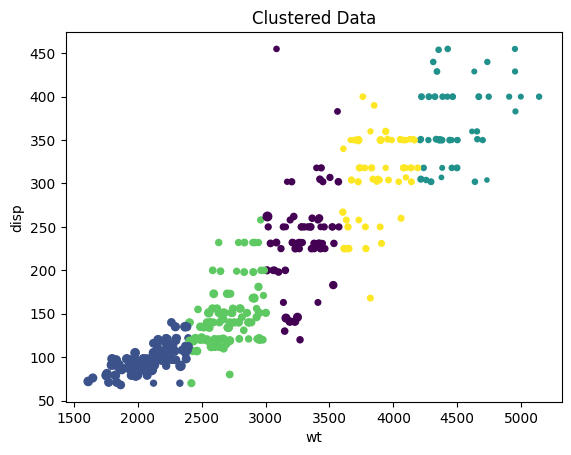

In [24]:
# create a scatter plot of the data colored by cluster label
plt.scatter(Car_Merged['wt'], Car_Merged['disp'], Car_Merged['mpg'], c=Car_Merged['cluster_label'], cmap='viridis')
plt.xlabel('wt')
plt.ylabel('disp')
plt.title('Clustered Data')
plt.show()

3.G. Pass a new DataPoint and predict which cluster it belongs to

In [25]:
new_data_point = {'mpg':10.5, 'cyl':4, 'disp':323, 'hp':126, 'wt':3400, 'acc':12.2, 'yr':75, 'origin':1}

In [26]:
new_df = pd.DataFrame([new_data_point])
predicted_cluster = kmeans.predict(new_df)
print("Predicted Cluster for this new data point is:", predicted_cluster)

Predicted Cluster for this new data point is: [0]


# Part B

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Understanding & Cleaning

1.A. Read ‘vehicle.csv’ and save as DataFrame

In [28]:
Vehicle = pd.read_csv(r'C:\Users\GARAVIN4\Documents\GL Course\Unsupervised Learning\vehicle.csv')

1.B. Check percentage of missing values and impute with correct approach

In [29]:
Vehicle.isnull().sum() * 100 / len(Vehicle)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [30]:
numeric_cols = Vehicle.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    Vehicle[col] = Vehicle[col].fillna(Vehicle[col].mean())

In [31]:
Vehicle.isnull().sum() * 100 / len(Vehicle)

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
class                          0.0
dtype: float64

1.C. Visualize a Pie-chart and print percentage of values for variable ‘class’

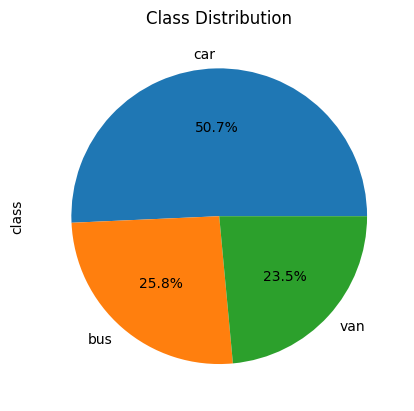

In [32]:
class_counts = Vehicle['class'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

class_percentages.plot(kind='pie', autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

1.D. Check for duplicate rows in the data and impute with correct approach

In [33]:
len(Vehicle[Vehicle.duplicated()]) # check how many duplicate rows are there

0

In [34]:
Vehicle = Vehicle.drop_duplicates(keep='first')

2. Data Preparation

2.A. Split data into X and Y. [Train and Test optional]

In [35]:
X = Vehicle.drop(columns=["class"]) 
y = Vehicle[["class"]]

2.B. Standardize the Data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

3. Model Building

3.A. Train a base Classification model using SVM

In [37]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_scaled, y.values.ravel())

y_pred_train = svc_model.predict(X_scaled)

3.B. Print Classification metrics for train data

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

acc_train = accuracy_score(y, y_pred_train)
precision_train = precision_score(y, y_pred_train, average='micro')
recall_train = recall_score(y, y_pred_train, average='micro')
f1_train = f1_score(y, y_pred_train, average='micro')

print("Accuracy_Train: ", acc_train)
print("Precision_Train: ", precision_train)
print("Recall_Train: ", recall_train)
print("F1 Score_Train: ", f1_train)

Accuracy_Train:  0.9810874704491725
Precision_Train:  0.9810874704491725
Recall_Train:  0.9810874704491725
F1 Score_Train:  0.9810874704491725


In [39]:
cm_train = confusion_matrix(y, y_pred_train)

print("confusion matrix_Test = \n", cm_train)
print("classification  Matrix:\n",classification_report(y, y_pred_train))

confusion matrix_Test = 
 [[214   0   4]
 [  2 421   6]
 [  1   3 195]]
classification  Matrix:
               precision    recall  f1-score   support

         bus       0.99      0.98      0.98       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



3.C. Apply PCA on the data with 10 components

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

3.D. Visualize Cumulative Variance Explained with Number of Components

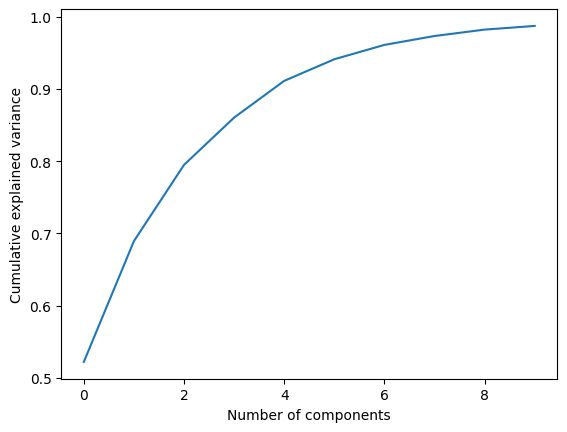

In [41]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

3.E. Draw a horizontal line on the above plot to highlight the threshold of 90%

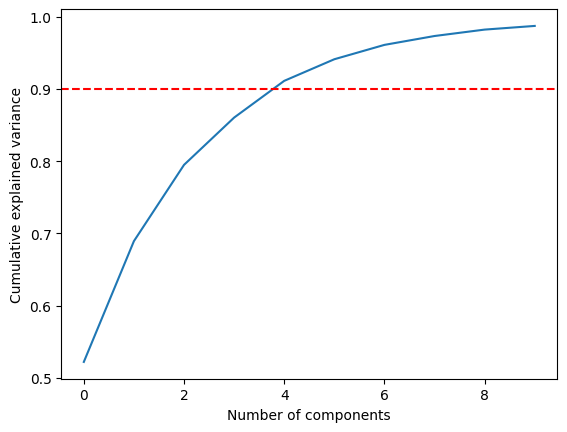

In [42]:
plt.plot(cumulative_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()

3.F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained

From the above plot, we can infer that 4 principal components explains ~90% of the variance 

In [43]:
pca = PCA(n_components=4)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

3.G. Train SVM model on components selected from above step

In [44]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_pca, y.values.ravel())
y_pred_train = svc_model.predict(X_pca)

3.H. Print Classification metrics for train data of above model and share insights

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

acc_train = accuracy_score(y, y_pred_train)
precision_train = precision_score(y, y_pred_train, average='micro')
recall_train = recall_score(y, y_pred_train, average='micro')
f1_train = f1_score(y, y_pred_train, average='micro')

print("Accuracy_Train: ", acc_train)
print("Precision_Train: ", precision_train)
print("Recall_Train: ", recall_train)
print("F1 Score_Train: ", f1_train)

Accuracy_Train:  0.7943262411347518
Precision_Train:  0.7943262411347518
Recall_Train:  0.7943262411347518
F1 Score_Train:  0.7943262411347517


In [46]:
cm_train = confusion_matrix(y, y_pred_train)

print("confusion matrix_Test = \n", cm_train)
print("classification  Matrix:\n",classification_report(y, y_pred_train))

confusion matrix_Test = 
 [[144  39  35]
 [ 10 384  35]
 [ 17  38 144]]
classification  Matrix:
               precision    recall  f1-score   support

         bus       0.84      0.66      0.74       218
         car       0.83      0.90      0.86       429
         van       0.67      0.72      0.70       199

    accuracy                           0.79       846
   macro avg       0.78      0.76      0.77       846
weighted avg       0.80      0.79      0.79       846



Insights: The training data performance metrics have reduced with the PCA components. The reason being with the original features, the model gave over-fitted results resulting in very high performance metrics ~98%. However with the PCA, the model is less prone to over-fitting and hence giving performance metrics ~79%. The metrics can be further improved with hyper-parameter tuning.

4. Performance Improvement

4.A. Train another SVM on the components out of PCA. Tune the parameters to improve performance

In [54]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_pca, y.values.ravel())

grid_predictions = grid.predict(X_pca)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.606 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.598 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.712 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.722 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.728 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.704 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.518 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

4.B. Share best Parameters observed from above step

In [55]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


4.C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with 
insights

In [56]:
acc_train = accuracy_score(y, grid_predictions)
precision_train = precision_score(y, grid_predictions, average='micro')
recall_train = recall_score(y, grid_predictions, average='micro')
f1_train = f1_score(y, grid_predictions, average='micro')

print("Accuracy_Train: ", acc_train)
print("Precision_Train: ", precision_train)
print("Recall_Train: ", recall_train)
print("F1 Score_Train: ", f1_train)

Accuracy_Train:  0.8569739952718676
Precision_Train:  0.8569739952718676
Recall_Train:  0.8569739952718676
F1 Score_Train:  0.8569739952718676


In [57]:
cm_train = confusion_matrix(y, grid_predictions)

print("confusion matrix_Test = \n", cm_train)
print("classification  Matrix:\n",classification_report(y, grid_predictions))

confusion matrix_Test = 
 [[177  24  17]
 [  7 395  27]
 [ 18  28 153]]
classification  Matrix:
               precision    recall  f1-score   support

         bus       0.88      0.81      0.84       218
         car       0.88      0.92      0.90       429
         van       0.78      0.77      0.77       199

    accuracy                           0.86       846
   macro avg       0.85      0.83      0.84       846
weighted avg       0.86      0.86      0.86       846



Insights: As expected, the performance of the model has improved after hyper-parameter tuning using GridSearchCV. The performance metrics have now improved from ~79% to ~86%.

5. Data Understanding & Cleaning

5.A. Explain pre-requisite/assumptions of PCA

1. Linearity: PCA assumes linear relationship between features and target variable. If the relationship is non-linear, then PCA may not be the most appropriate technique for dimensionality reduction.

2. Homoscedasticity: PCA assumes that the variance of the data is constant across all variables else can lead to distorted results when applying PCA.

3. Normality: PCA assumes that the data follows a normal distribution else, it may be necessary to apply transformations to the data before applying PCA.

4. Independence: PCA assumes that the variables in the data are independent of each other else, PCA may not be the most appropriate technique for dimensionality reduction.

5. Large Sample Size: PCA works best when the sample size is large enough to capture the underlying variability of the data else, PCA may not be able to accurately capture the most important patterns in the data.

6. Scaling of the Data: PCA is sensitive to the scaling of the data, so it is important to scale the data before applying PCA else, PCA would give too much importance to variables with larger scales.

5.B. Explain advantages and limitations of PCA

Advantages of PCA:

1. Dimensionality Reduction: PCA can be used to reduce the dimensionality of high-dimensional data while preserving the most important information. This can be useful in reducing the computational complexity of a problem.

2. Feature Extraction: PCA can be used to extract the most important features from a large set of variables. This can be useful in reducing the noise in the data and making it easier to interpret the results.

3. Data Visualization: PCA can be used to visualize the data in a lower-dimensional space. This can be useful in identifying patterns and relationships that may not be apparent in the original high-dimensional data.

4. Eliminates Multicollinearity: PCA can help to eliminate multicollinearity, which is a common problem in high-dimensional data and can lead to unstable estimates of the parameters in a model.

Limitations of PCA:

1. Loss of Information: PCA can potentially result in a loss of information, as it transforms the original features into a new set of features that capture the most important variations in the data. 

2. Interpretation: It may be difficult to interpret the meaning of the principal components as the principal components are linear combinations of the original variables.

3. Linearity Assumption: PCA assumes that the relationships between the variables are linear. If the data contains non-linear relationships between the variables, PCA may not be the most appropriate technique for dimensionality reduction.

4. Outliers: PCA is sensitive to outliers in the data, which can have a significant impact on the results. If there are outliers in the data, it may be necessary to remove them before applying PCA.

5. Scaling: PCA is sensitive to the scaling of the data, so it is important to scale the data before applying PCA. If the variables are on different scales, PCA may give too much importance to variables with larger scales.

6. Sample Size: PCA works best when the sample size is large enough and may not be able to accurately capture the most important patterns/variability in the data if the sample size is too small.

# Thank You!